In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./data/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])  
df = df.drop(columns=['Date'])

# 원하는 열을 새로운 행 인덱스로 지정하고 오름차순 정렬
df = df.set_index('new_Date').sort_index()

df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-06-01,11900,11800,12100,11750,32062
2018-06-04,11900,11900,12200,11700,25171
2018-06-05,12150,11800,12250,11800,42485
2018-06-07,11950,12200,12300,11900,49088
2018-06-08,11950,11950,12200,11800,59258


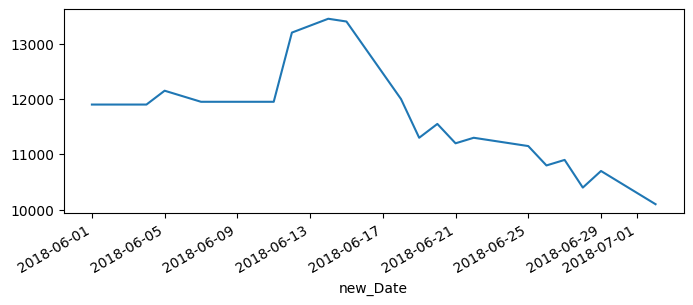

In [2]:
# 종가(Close) 변화를 시각화 (시리즈 객체)
df['Close'].plot(figsize=(8, 3));

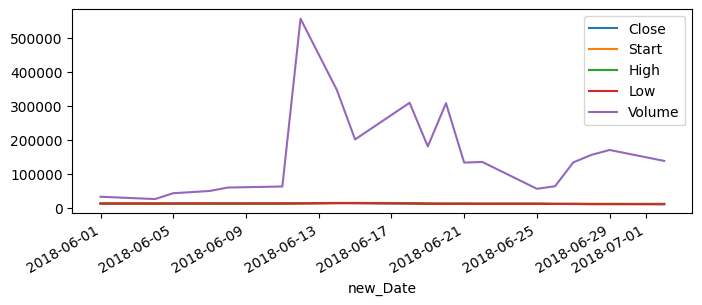

In [3]:
# 데이터프레임 전체 시각화
df.plot(figsize=(8, 3));

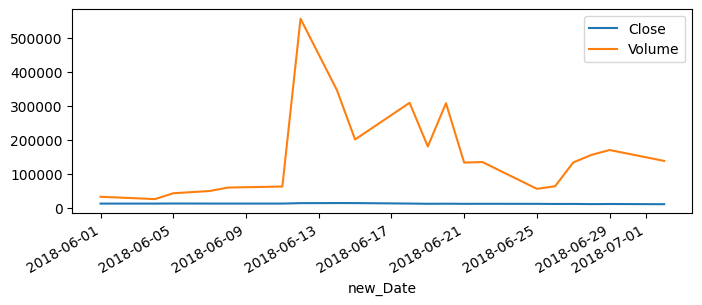

In [4]:
# 종가(Close)와 거래량(volume) 변화를 함께 시각화 
df[['Close', 'Volume']].plot(figsize=(8, 3));

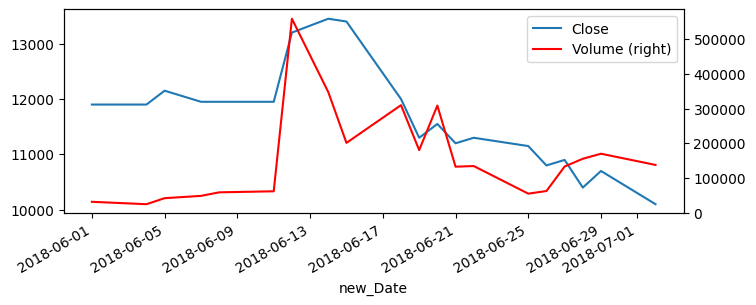

In [5]:
# 보조축 표시
df["Close"].plot(label='Close', legend=True, figsize=(8, 3));
df["Volume"].plot(secondary_y=True, style="r", label='Volume', legend=True);

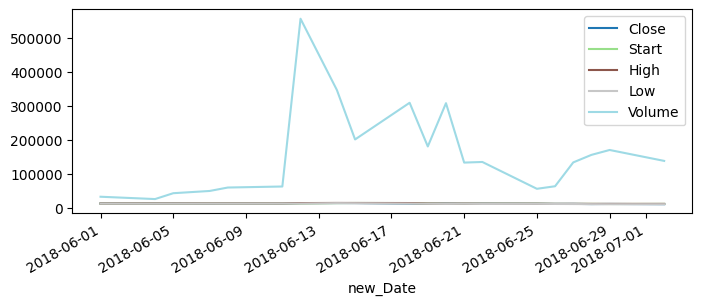

In [6]:
# 색상 맵 
df.plot(figsize=(8, 3), colormap="tab20");

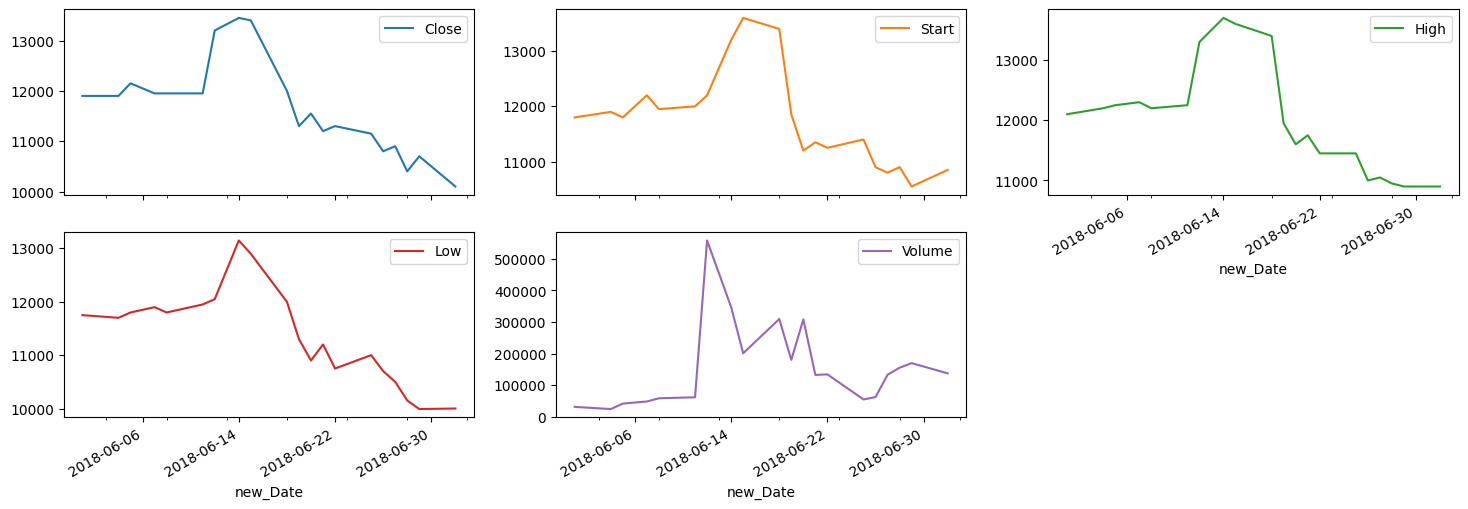

In [7]:
# 그리드 레이아웃 - 서브 플롯 
axes = df.plot(subplots=True, layout=(2, 3), figsize=(18, 6), sharex=True, sharey=False)

# x 축의 주요 레이블 위치를 최대 5개로 제한
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(5))

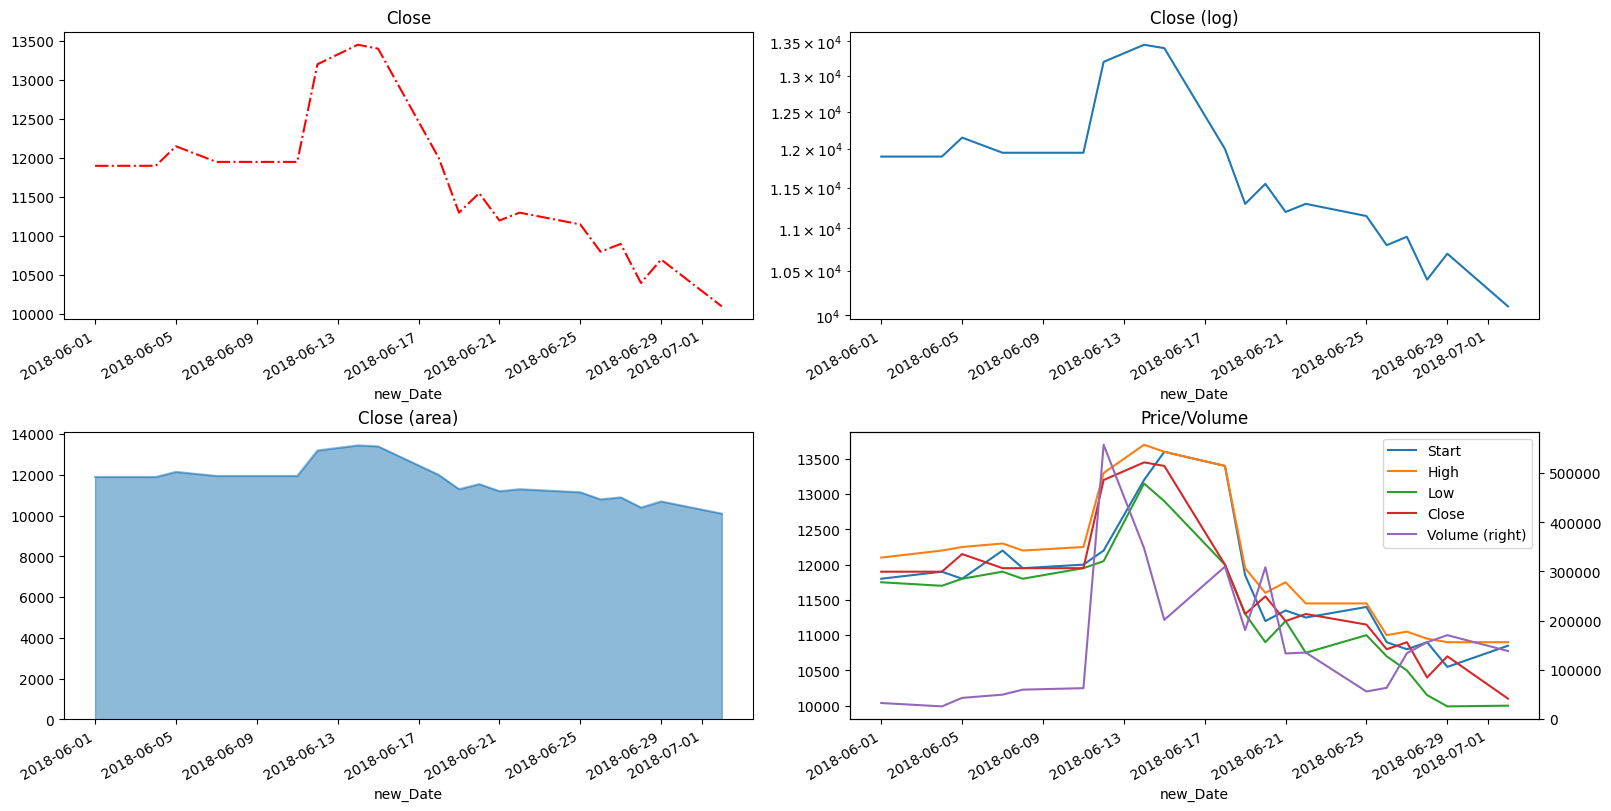

In [8]:
# Figure, Axes 객체
fig, axes = plt.subplots(nrows=2, ncols=2, 
                         figsize=(16, 8),
                         constrained_layout=True)

# 선 스타일
df['Close'].plot(ax=axes[0, 0], style="r-.")
axes[0, 0].set_title('Close')

# 로그 스케일 변환
df['Close'].plot(ax=axes[0, 1], logy=True)
axes[0, 1].set_title('Close (log)')

# 면적 그래프
df['Close'].plot(ax=axes[1, 0], kind='area', alpha=0.5)
axes[1, 0].set_title('Close (area)')

# 보조축 적용
df[['Start', 'High', 'Low', 'Close']].plot(ax=axes[1, 1], legend=True)
df['Volume'].plot(ax=axes[1, 1], legend=True, secondary_y=True)
axes[1, 1].set_title('Price/Volume')

plt.show()